In [204]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [205]:
class My_Ridge_Regression:

    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.weights = None
        self.intercept = None

    def fit(self, X_train, y_train):
        X_train = np.array(X_train)
        y_train = np.array(y_train)

        n_samples, n_features = X_train.shape
        X_bias = np.c_[np.ones((n_samples, 1)), X_train]
        I = np.eye(n_features + 1)
        I[0, 0] = 0 
        theta = np.dot(
            np.linalg.inv(
                np.dot(X_bias.T, X_bias) + self.alpha * I
            ),
            np.dot(X_bias.T, y_train)
        )

        self.intercept = theta[0]
        self.weights = theta[1:]

    def predict(self, X_test):
        X_test = np.array(X_test)
        return np.dot(X_test, self.weights) + self.intercept


In [206]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [207]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [208]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [210]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [211]:
df.isnull().sum().sum()

207

In [212]:
df.duplicated().sum()

0

In [213]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [214]:
df['total_bedrooms'].value_counts

<bound method IndexOpsMixin.value_counts of 0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64>

In [215]:
df['total_bedrooms'].nunique()

1923

<Axes: ylabel='Frequency'>

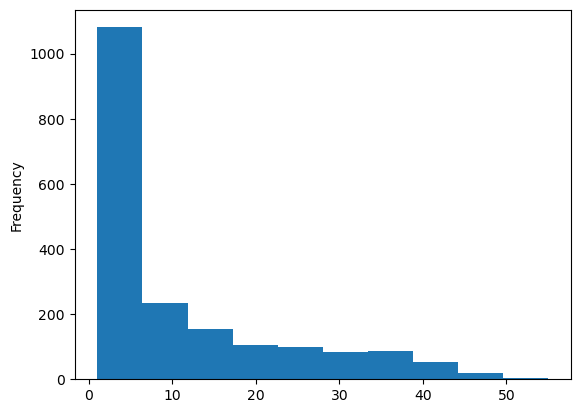

In [216]:
df['total_bedrooms'].value_counts().plot(kind='hist')

In [217]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

<Axes: xlabel='ocean_proximity'>

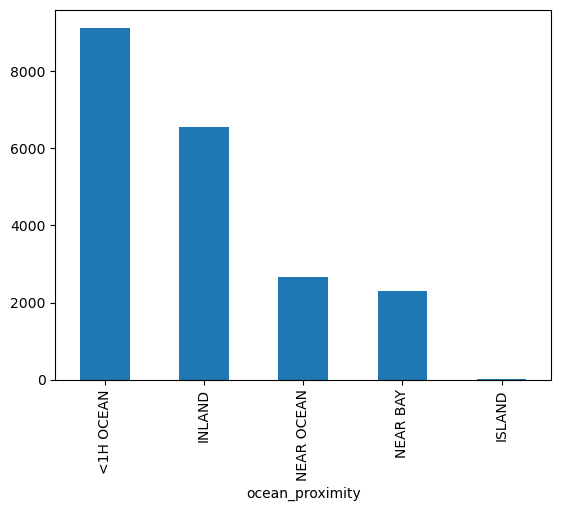

In [218]:
df['ocean_proximity'].value_counts().plot(kind='bar')

In [219]:
df.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


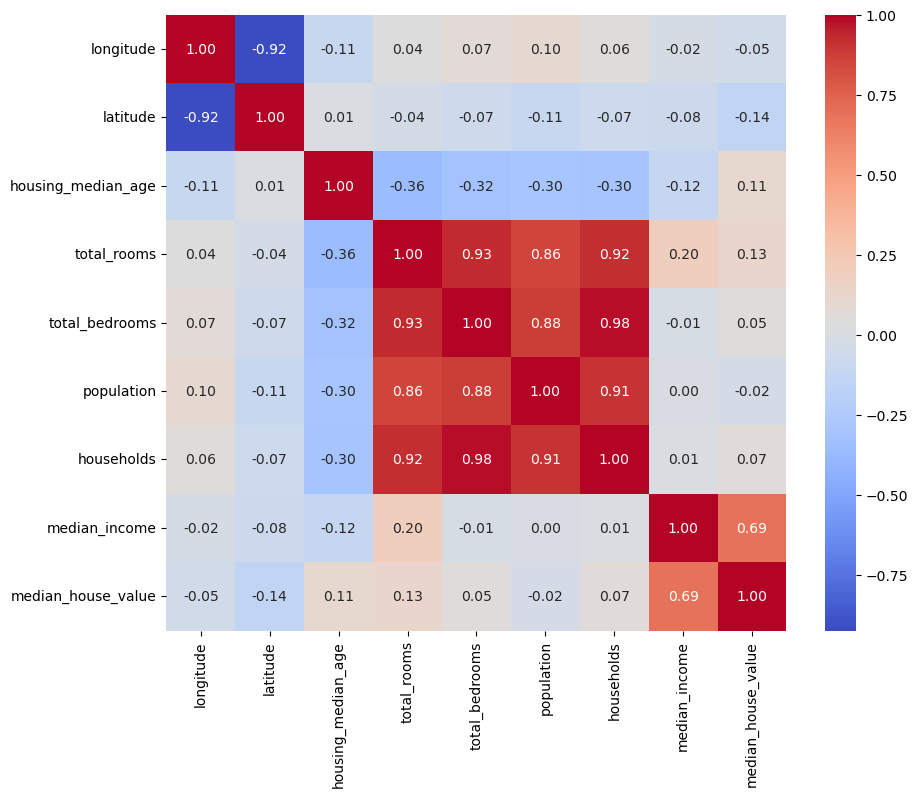

In [220]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

<Figure size 1000x800 with 0 Axes>

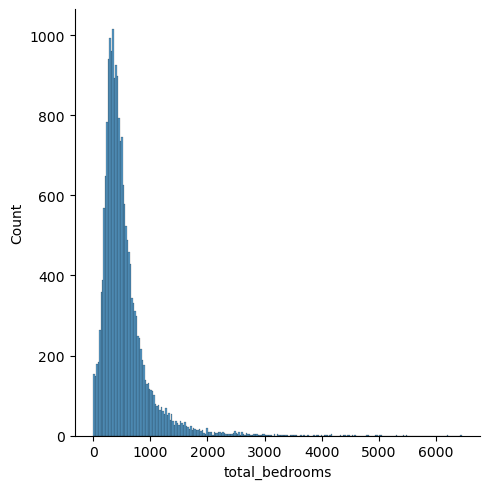

In [221]:
plt.figure(figsize=(10,8))
sns.displot(df['total_bedrooms'])
plt.show()

In [222]:
df['total_bedrooms'].skew()

3.459546331523342

In [223]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [224]:
from sklearn.model_selection import train_test_split

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [226]:
df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)

In [227]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

X_train["total_bedrooms"] = imputer.fit_transform(
    X_train[["total_bedrooms"]]
)

X_test["total_bedrooms"] = imputer.transform(
    X_test[["total_bedrooms"]]
)


In [228]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

# Fit only on TRAIN
X_train_ohe = ohe.fit_transform(X_train[["ocean_proximity"]])
X_test_ohe  = ohe.transform(X_test[["ocean_proximity"]])


In [229]:
X_train_num = X_train.drop("ocean_proximity", axis=1)
X_test_num  = X_test.drop("ocean_proximity", axis=1)


In [230]:
X_train_final = np.hstack([X_train_num.values, X_train_ohe])
X_test_final  = np.hstack([X_test_num.values, X_test_ohe])

In [231]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled  = scaler.transform(X_test_final)


In [232]:
model = My_Ridge_Regression(alpha=1.0)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [233]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R²: 0.6254712354675862
RMSE: 70056.11005849147


In [234]:
for a in [0.1, 1, 10, 50, 100]:
    model = My_Ridge_Regression(alpha=a)
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    print(a, r2_score(y_test, pred))

0.1 0.6254415850922421
1 0.6254712354675862
10 0.6257481360773623
50 0.6266326419656287
100 0.6272062071019049
